In [23]:
from qiskit import *

In [24]:
%matplotlib inline

In [25]:
#grover's algorithm for 2 quibits to find |11>

In [26]:
circuit1 = QuantumCircuit(2)

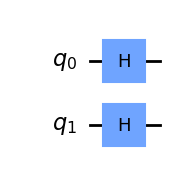

In [27]:
# two hadamard gates to give equivalent(amplitude) superposition of both the qubits
circuit1.h(0)
circuit1.h(1)
circuit1.draw(output='mpl')

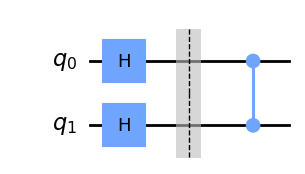

In [28]:
# this is the oracle (a function box) coincidentally the oracle to fnd and mark |11> (2qubit circuit) is a controlled z gate
circuit1.barrier()
circuit1.cz(0,1)
circuit1.draw(output='mpl')

In [29]:
# what this oracle basically does is put a negative phase onto the qubit we chosen or marked in this case it is |11> and
# oracle happens to be a simple gate

In [30]:
# now define the diffuser function , what this does is amplify the amplitude of the chosen qubit and decrease those which
# are not the chosen ones

In [31]:
circuit1.barrier()
# this transforms the earlier transformed qubits back to simple |0> or |1>
circuit1.h(0)
circuit1.h(1)

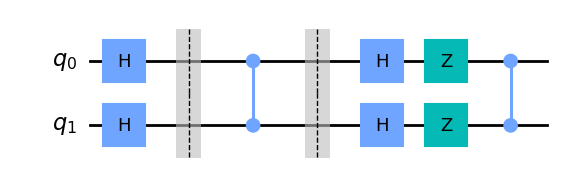

In [32]:
# apply a circuit that adds a negative phase to the states orthogonal to  |0>
# why do add z gates? why not  
circuit1.z(0)
circuit1.z(1)
circuit1.cz(0,1)
circuit1.draw(output='mpl')

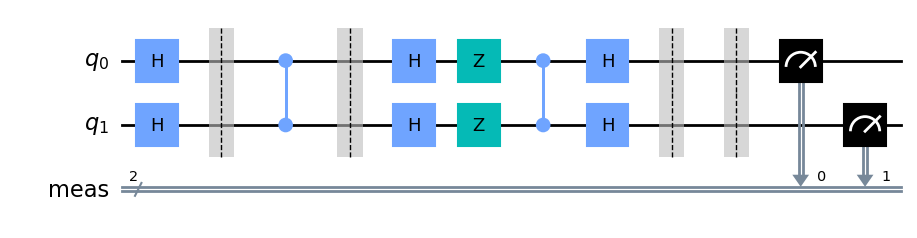

In [33]:
circuit1.h(0)
circuit1.h(1)
circuit1.barrier()
circuit1.measure_all()
circuit1.draw(output='mpl')

In [34]:
# what if we use x gates instead of z gates in circuit

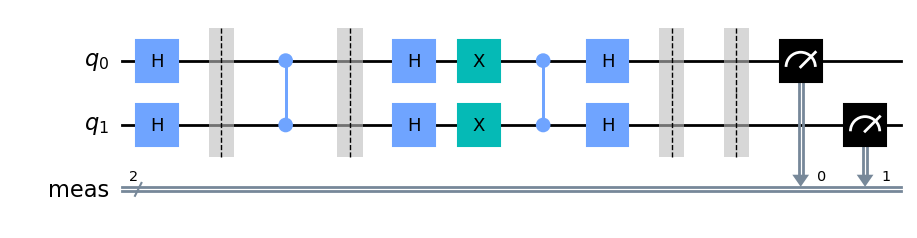

In [35]:
circuit2 = QuantumCircuit(2)
circuit2.h(0)
circuit2.h(1)
circuit2.barrier()
circuit2.cz(0,1)
circuit2.barrier()

circuit2.h(0)
circuit2.h(1)
circuit2.x(0) # using x gates instead of z gates 
circuit2.x(1)
circuit2.cz(0,1)
circuit2.h(0)
circuit2.h(1)
circuit2.barrier()
circuit2.measure_all()
circuit2.draw(output='mpl')

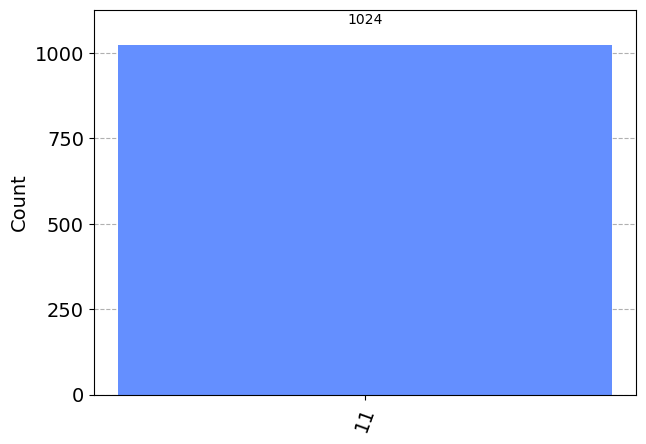

In [36]:
from qiskit.tools.jupyter import *
from qiskit.visualization import *

backend = Aer.get_backend('qasm_simulator')
job = execute(circuit1, backend, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

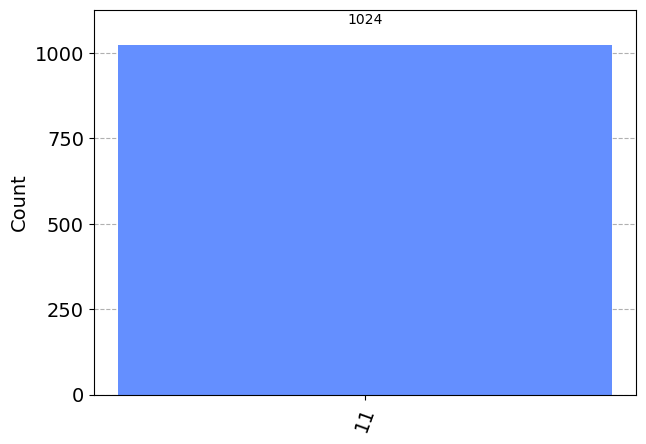

In [37]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit2, backend, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

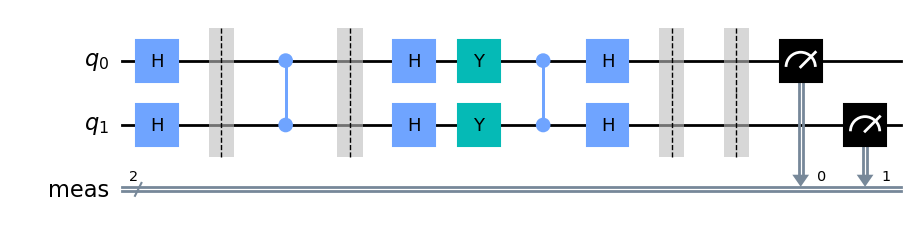

In [38]:
# what if we use y gates instead of z gates in circuit
circuit3 = QuantumCircuit(2)
circuit3.h(0)
circuit3.h(1)
circuit3.barrier()
circuit3.cz(0,1)
circuit3.barrier()

circuit3.h(0)
circuit3.h(1)
circuit3.y(0) # using y gates instead of z gates 
circuit3.y(1)
circuit3.cz(0,1)
circuit3.h(0)
circuit3.h(1)
circuit3.barrier()
circuit3.measure_all()
circuit3.draw(output='mpl')

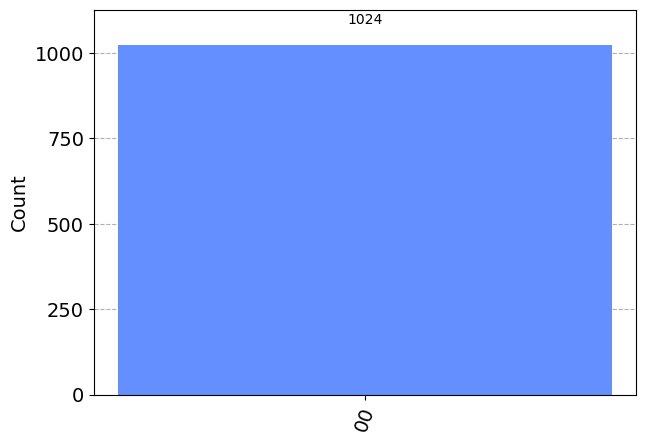

In [39]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit3, backend, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [40]:
# why does x gate point to 11 adn y gate to 00
#https://quantumcomputing.stackexchange.com/questions/13313/how-can-you-decompose-grovers-diffusion-operator-into-gates
# the above link explains the stuff about x gate 

In [41]:
# the aforementioned circuits all were for the qubit |11> now we chose |00> since its next easiest thing 

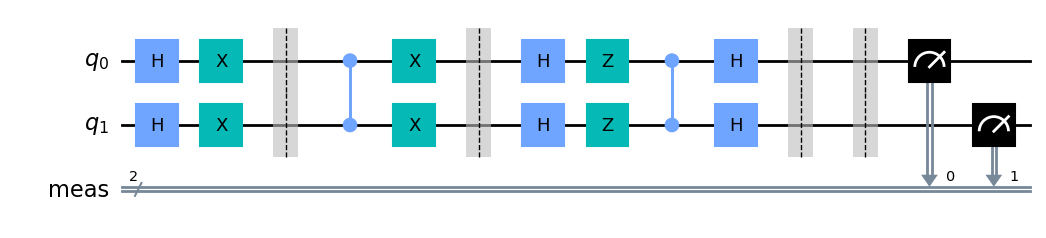

In [42]:
circuit4 = QuantumCircuit(2)
circuit4.h(0)
circuit4.h(1)
circuit4.x(0) # convert |00> to |11>
circuit4.x(1)
circuit4.barrier()
circuit4.cz(0,1)
circuit4.x(0) # convert |11> to |00>
circuit4.x(1)
circuit4.barrier()

circuit4.h(0)
circuit4.h(1)
circuit4.z(0)
circuit4.z(1)
circuit4.cz(0,1)
circuit4.h(0)
circuit4.h(1)
circuit4.barrier()
circuit4.measure_all()
circuit4.draw(output='mpl')

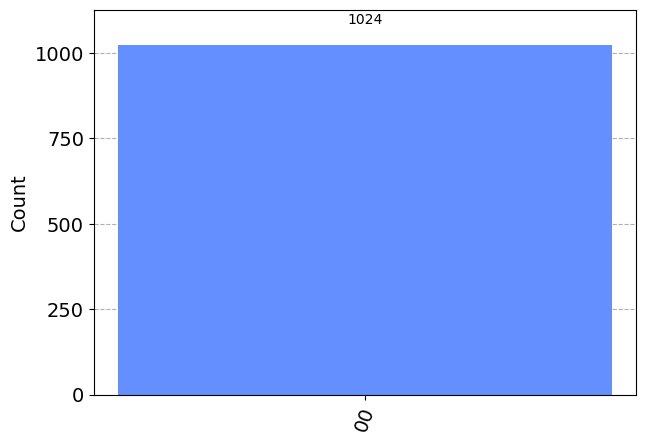

In [43]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit4, backend, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [ ]:
# similarly we can convert 11 algorithm and apply it all other qubits